# Import and Load

In [243]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Raw ICD-11 

In [244]:
df = pd.read_csv('icd11-25_data_raw.csv')
df.columns

Index(['id', 'code', 'title', 'browser_url', 'class_kind', 'definition',
       'parent', 'inclusions', 'foundation_children',
       'foundation_child_references', 'index_terms', 'related_entities',
       'full_text', 'children', 'postcoordination_scales',
       'index_term_references', 'exclusions', 'exclusion_references',
       'fully_specified_name'],
      dtype='object')

Based on the ICD-11 Reference Guide (refguide_ICD11.pdf), here's an explanation of the columns you listed, likely extracted from the ICD-11 API:

1.  **`id`**: This corresponds to the **Uniform Resource Identifier (URI)**. Each entity (disease, disorder, finding, etc.) in the ICD-11 Foundation Component has a unique URI that identifies it regardless of language or context[cite: 324, 3198].
2.  **`code`**: This is the alphanumeric **ICD-11 code** (e.g., 1A00, 9B71.0Z, XA1X49) assigned to categories in a specific tabular list (like the MMS list for mortality and morbidity) or used for extension codes[cite: 103, 311, 312]. Stem codes (from main chapters) can be used alone, while extension codes (starting with 'X') add detail and must be used with a stem code for statistical classification[cite: 566, 336].
3.  **`title`**: This is the standard, preferred name or label for the ICD entity in the given language[cite: 513, 528].
4.  **`browser_url`**: This is likely the direct web address (URL) to view the specific entity in the official WHO ICD-11 online browser[cite: 228, 485]. The `id` (URI) usually forms part of this URL.
5.  **`class_kind`**: This field indicates the type or level of the entity within the ICD-11 structure. More info below.
6.  **`definition`**: This contains the official textual description explaining the meaning and scope of the entity[cite: 2734, 2745, 3163]. The guide distinguishes between a mandatory short description (max 100 words) and optional longer additional information[cite: 2734, 2745].
7.  **`parent`**: This lists the identifier(s) (URI) of the immediate parent(s) of this entity in the ICD-11 hierarchy. While tabular lists are typically mono-hierarchical (one primary parent), the underlying Foundation Component supports multiple parenting (e.g., classifying a disease by both aetiology and anatomical site)[cite: 87, 361, 427, 3149].
8.  **`inclusions`**: These are terms listed under a category title that serve as examples of diagnostic statements or synonyms classified to that category. They help clarify the content and scope of the category but are not exhaustive[cite: 503, 504, 506].
9.  **`foundation_children`**: This likely lists the direct children (more specific entities) of this entity within the comprehensive **Foundation Component** hierarchy[cite: 87, 3157].
10. **`foundation_child_references`**: Contains the identifiers (URIs) for the entities listed in `foundation_children`.
11. **`index_terms`**: These are terms (including synonyms and clinical phrases) found in the ICD-11 Alphabetical Index that lead to this specific entity/code[cite: 355, 479, 3163].
12. **`related_entities`**: While not explicitly defined as a column name in the guide, this likely refers to non-hierarchical relationships defined in the Foundation Component, possibly including links indicated by 'Code also' notes or exclusions.
13. **`full_text`**: This term isn't explicitly defined for a column in the guide. It might be a convenience field concatenating text from the `title`, `definition`, `inclusions`, etc., or it could represent the detailed "Additional Information" (long definition) mentioned in the guide[cite: 2745].
14. **`children`**: This likely lists the direct children of this entity within a *specific tabular list* (like the MMS list), as opposed to `foundation_children` which reflects the broader Foundation structure[cite: 361, 3157]. Tabular lists are often simplified or rearranged versions of the Foundation.
15. **`postcoordination_scales`**: This refers to the specific axes or dimensions (often represented by Extension Codes) that can be combined (postcoordinated) with this entity's stem code to add more detail, such as severity, anatomy, laterality, or causality[cite: 339, 603, 2043].
16. **`index_term_references`**: Contains the identifiers for the terms listed in `index_terms`.
17. **`exclusions`**: These are terms listed under a category that specify conditions classified *elsewhere*. They help define the boundaries of the category[cite: 514, 516].
18. **`exclusion_references`**: Contains the identifiers (URIs/codes) for the conditions listed in `exclusions`.
19. **`fully_specified_name`**: This is the complete, unambiguous title for the entity, designed to be clear without needing hierarchical context, as mentioned on page 317 of the guide[cite: 3179].

**Class Kind** possible types:
* **`chapter`**: The highest level of structural organization in ICD-11. Chapters group broad areas of diseases, disorders, external causes, or other health-related conditions. The first character of an ICD-11 code typically relates to its chapter.
* **`block`**: An intermediate hierarchical grouping of categories within a chapter. Blocks are used for organizing related conditions and can be used for aggregated statistical reporting, but they generally do not have their own specific ICD codes for diagnosing individual cases.
* **`category`**: A specific, codable entry in an ICD-11 tabular list representing a distinct disease, disorder, injury, symptom, external cause, or other health-related problem. Categories are assigned an ICD-11 stem code and are the units used for detailed data recording and statistical analysis.
* **`window`**: A structural element, mentioned in the context of multiple parenting and user guidance (page 45). It allows a set of conditions to be displayed in an alternative hierarchical location (secondary parentage) for Browse or specialty views, without that being its primary classification point. A window in such an alternative location typically has "no primary children, no terms, no residual categories" itself.

## Data Types and Nans

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13960 entries, 0 to 13959
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13960 non-null  int64 
 1   code                         13062 non-null  object
 2   title                        13960 non-null  object
 3   browser_url                  13960 non-null  object
 4   class_kind                   13960 non-null  object
 5   definition                   6894 non-null   object
 6   parent                       13960 non-null  object
 7   inclusions                   1113 non-null   object
 8   foundation_children          1468 non-null   object
 9   foundation_child_references  1468 non-null   object
 10  index_terms                  10855 non-null  object
 11  related_entities             2287 non-null   object
 12  full_text                    13960 non-null  object
 13  children                     32

In [246]:
df.loc[df['code'].isna(), 'code'] = ""
df['code'] = df['code'].astype(str)

df.loc[df['title'].isna(), 'title'] = ""
df['title'] = df['title'].astype(str)

df['browser_url'] = df['browser_url'].astype(str)

df['class_kind'] = df['class_kind'].astype(str)

df.loc[df['definition'].isna(), 'definition'] = ""
df['definition'] = df['definition'].astype(str)

df.loc[df['parent']=='mms', 'parent'] = '1000000000'
df['parent'] = df['parent'].astype(int)

df.loc[df['inclusions'].isna(), 'inclusions'] = ""
df['inclusions'] = df['inclusions'].astype(str)

df.loc[df['foundation_children'].isna(), 'foundation_children'] = ""
df['foundation_children'] = df['foundation_children'].astype(str)

df.loc[df['foundation_child_references'].isna(), 'foundation_child_references'] = ""
df['foundation_child_references'] = df['foundation_child_references'].astype(str)

df.loc[df['index_terms'].isna(), 'index_terms'] = ""
df['index_terms'] = df['index_terms'].astype(str)

df.loc[df['related_entities'].isna(), 'related_entities'] = ""
df['related_entities'] = df['related_entities'].astype(str)

df['full_text'] = df['full_text'].astype(str)

def clean_children_str(children_str):
    items = [x.strip() for x in children_str.split(';')]
    return [x for x in items if x not in ['other', 'unspecified']]
df.loc[df['children'].isna(), 'children'] = ""
df['children'] = df['children'].apply(clean_children_str)

df.loc[df['postcoordination_scales'].isna(), 'postcoordination_scales'] = '{}'

df.loc[df['index_term_references'].isna(), 'index_term_references'] = ""
df['index_term_references'] = df['index_term_references'].astype(str)

def clean_exclusions_str(exclusions_str):
    return [x.strip() for x in exclusions_str.split(';')]
df.loc[df['exclusions'].isna(), 'exclusions'] = ""
df['exclusions'] = df['exclusions'].apply(clean_exclusions_str)

df.loc[df['exclusion_references'].isna(), 'exclusion_references'] = ""
df['exclusion_references'] = df['exclusion_references'].astype(str)

df.loc[df['fully_specified_name'].isna(), 'fully_specified_name'] = ""
df['fully_specified_name'] = df['fully_specified_name'].astype(str)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13960 entries, 0 to 13959
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           13960 non-null  int64 
 1   code                         13960 non-null  object
 2   title                        13960 non-null  object
 3   browser_url                  13960 non-null  object
 4   class_kind                   13960 non-null  object
 5   definition                   13960 non-null  object
 6   parent                       13960 non-null  int64 
 7   inclusions                   13960 non-null  object
 8   foundation_children          13960 non-null  object
 9   foundation_child_references  13960 non-null  object
 10  index_terms                  13960 non-null  object
 11  related_entities             13960 non-null  object
 12  full_text                    13960 non-null  object
 13  children                     13

## Outliers

In [248]:
df['definition'].str.len().sort_values(ascending=False)[:10]

13440    6083
196      3654
108      2614
523      2224
6114     1827
12545    1724
12433    1608
12718    1550
743      1533
13073    1507
Name: definition, dtype: int64

In [249]:
df.loc[13440, 'definition'] = """ Severity of Vision Impairment Classification. No vision impairment. Eual to or better than: 6/12, 5/10 (0.5), 20/40 (0.3). 1) Mild vision impairment. Worse than: 6/12, 5/10 (0.5), 20/40 (0.3); equal to or better than: 6/18, 3/10 (0.3), 20/70 (0.5). 2) Moderate vision impairment. Worse than: 6/18, 3/10 (0.3), 20/70 (0.5); equal to or better than: 6/60, 1/10 (0.1), 20/200 (1.3). 3) Severe vision impairment. Worse than: 6/60, 1/10 (0.1), 20/200 (1.3); equal to or better than: 3/60, 1/20 (0.05), 20/400 (1.3). 4) Blindness. Worse than: 3/60, 1/20 (0.05), 20/400 (1.3); equal to or better than: 1/60, 1/50 (0.02), 5/300 (20/1200) (1.8). Note: Visual acuity is presented in metres, decimals, feet, and logMar.
"""

In [250]:
df['definition'].str.split().str.len().sort_values(ascending=False)[:10]

196      573
108      397
523      339
6114     282
13073    245
12545    237
12433    229
12718    225
12735    223
12222    220
Name: definition, dtype: int64

In [251]:
df['definition'].str.split('.').str.len().sort_values(ascending=False)[:10]

196      35
13440    31
12749    26
523      20
9101     19
743      19
582      19
108      19
12538    19
12312    18
Name: definition, dtype: int64

## Definition Quality

Define quality measuring metrics and methods to evaluate descriptions.

### Length

Character length:
 count    13960.000000
mean       153.656734
std        234.053093
min          0.000000
25%          0.000000
50%          0.000000
75%        236.000000
max       3654.000000
Name: definition, dtype: float64 

Words:
 count    13960.000000
mean        22.457378
std         34.164814
min          0.000000
25%          0.000000
50%          0.000000
75%         35.000000
max        573.000000
Name: definition, dtype: float64 

Sentences:
 count    13960.000000
mean         2.190473
std          1.902836
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         35.000000
Name: definition, dtype: float64 



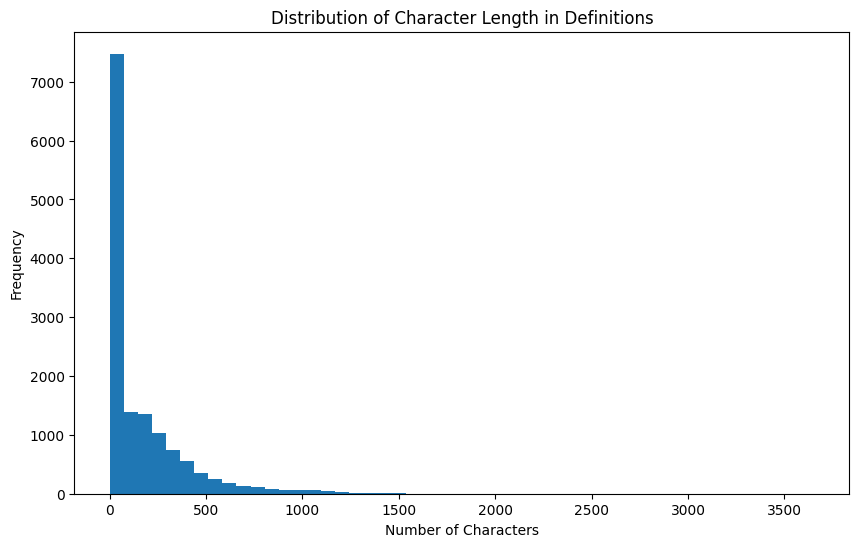

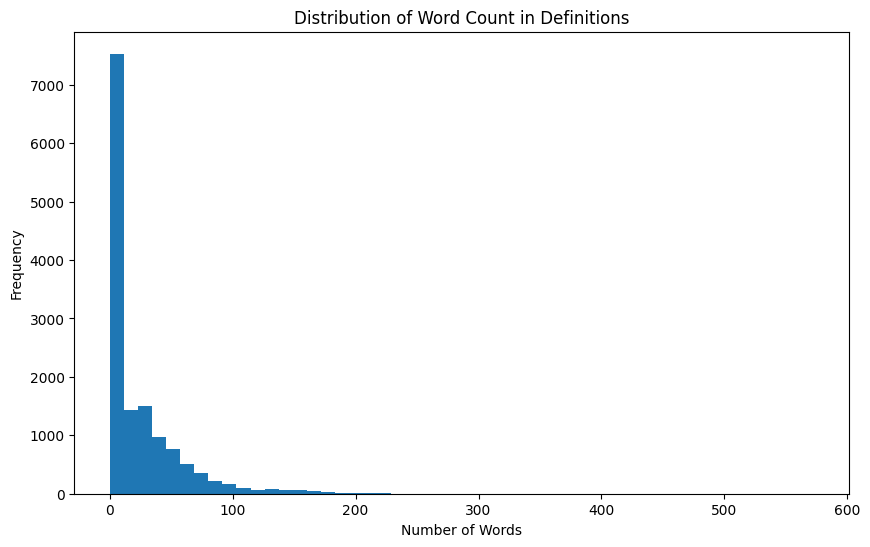

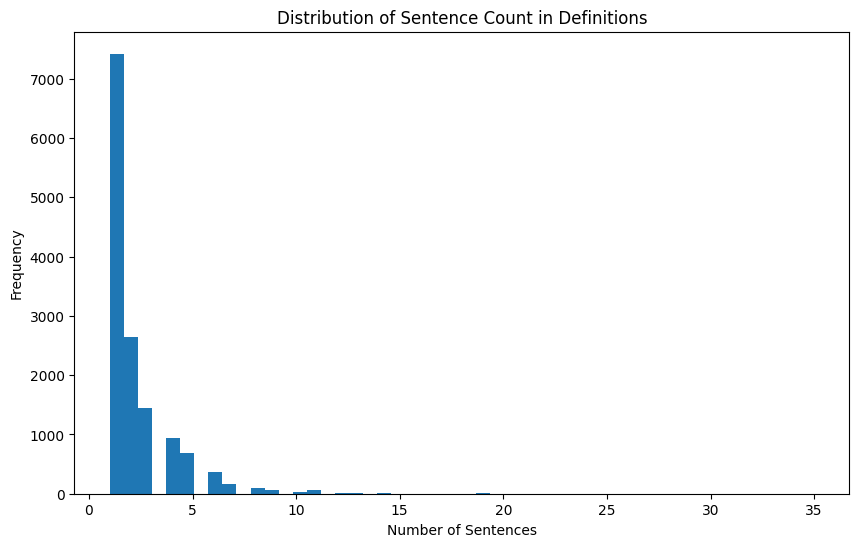

In [252]:
# length description
# character length
print('Character length:\n', df['definition'].str.len().describe(), '\n')

# words
print('Words:\n', df['definition'].str.split().str.len().describe(), '\n')

# sentences
print('Sentences:\n', df['definition'].str.split('.').str.len().describe(), '\n')

# length description
# character length
plt.figure(figsize=(10,6))
plt.hist(df['definition'].str.len(), bins=50)
plt.title('Distribution of Character Length in Definitions')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# words
plt.figure(figsize=(10,6))
plt.hist(df['definition'].str.split().str.len(), bins=50)
plt.title('Distribution of Word Count in Definitions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# sentences
plt.figure(figsize=(10,6))
plt.hist(df['definition'].str.split('.').str.len(), bins=50)
plt.title('Distribution of Sentence Count in Definitions')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

In [253]:
print(df['definition'].iloc[0].replace('. ', '.\n'))

Any condition caused by an infection with the gram-negative bacteria Chlamydia psittaci.
These conditions are characterised by variable clinical presentations such as fever, cough, headaches, chills, fatigue, nausea, vomiting, diarrhoea, or pneumonia.
Transmission is commonly by inhalation of aerosol contaminated with body fluids from infected birds, or direct contact with infected birds.
Confirmation is by identification of Chlamydia psittaci.


### Completeness

In [262]:
def add_definition_completeness_scores(df):
    # Create a copy of the dataframe
    result_df = df.copy()
    
    # Add the new column
    result_df['completeness'] = None
    
    # Define aspects and keywords for scoring
    aspects = {
    'overview': [
        'is a', 'are a', 'defined as', 'refers to', 'condition', 'disease', 'disorder',
        'syndrome', 'illness', 'characterized by', 'affecting', 'occurs when', 'type of',
        'form of', 'group of', 'category of', 'class of', 'classification', 'entity',
        'pathology', 'abnormality', 'problem', 'health issue', 'medical', 'clinical',
        'pathological', 'involves', 'designates', 'term for', 'describes', 'relating to',
        'concerning', 'pertaining to', 'associated with', 'manifested by', 'feature of'
    ],
    'causes': [
        'cause', 'etiology', 'risk factor', 'due to', 'result of', 'caused by', 
        'trigger', 'associated with', 'genetic', 'infection', 'bacteria', 'virus',
        'fungus', 'parasite', 'hereditary', 'environmental', 'exposure', 'origin',
        'source', 'underlying', 'predisposing', 'development', 'derived', 'acquired',
        'congenital', 'induced by', 'secondary to', 'following', 'after', 'linked to',
        'consequence of', 'sequela', 'complication', 'outcome', 'related to', 'response',
        'autoimmune', 'toxin', 'chemical', 'radiation', 'trauma', 'injury', 'defect',
        'mutation', 'deficiency', 'excess', 'pathogen', 'agent', 'mechanism'
    ],
    'symptoms': [
        'symptom', 'sign', 'present with', 'manifests as', 'characterized by', 
        'presentation', 'clinical feature', 'pain', 'fever', 'swelling', 'fatigue',
        'discomfort', 'ache', 'loss', 'impair', 'dysfunction', 'manifestation',
        'complaint', 'report', 'sensation', 'experience', 'feeling', 'suffer',
        'exhibit', 'display', 'show', 'demonstrat', 'express', 'appear', 'develop',
        'progress', 'worsen', 'improve', 'resolve', 'persist', 'severe', 'mild',
        'moderate', 'acute', 'chronic', 'subjective', 'objective', 'visible', 
        'palpable', 'tender', 'redness', 'rash', 'lesion', 'weakness', 'numbness',
        'tingling', 'stiff', 'rigid', 'sore', 'uncomfortable', 'irritat', 'inflam'
    ],
    'transmission': [
        'transmit', 'spread', 'contagious', 'infectious', 'vector', 'airborne',
        'waterborne', 'bloodborne', 'contact', 'carrier', 'contamination', 
        'infected', 'transmitted by', 'spreads through', 'communicable',
        'person-to-person', 'direct', 'indirect', 'fecal-oral', 'droplet',
        'aerosol', 'bodily fluid', 'saliva', 'blood', 'sexual', 'vertical',
        'maternal', 'perinatal', 'breast milk', 'transplacental', 'nosocomial',
        'hospital-acquired', 'community-acquired', 'endemic', 'epidemic', 'pandemic',
        'zoonotic', 'animal', 'insect', 'mosquito', 'tick', 'flea', 'lice', 'parasite',
        'reservoir', 'host', 'incubation', 'shedding'
    ],
    'diagnosis': [
        'diagnos', 'test', 'examination', 'detection', 'screening', 'identified by',
        'laboratory', 'imaging', 'scan', 'blood test', 'confirmed by', 'biopsy',
        'differential', 'assess', 'evaluation', 'workup', 'investigation', 'findings',
        'clinical', 'physical', 'history', 'criteria', 'marker', 'indicator', 'biomarker',
        'analyze', 'measure', 'monitor', 'observe', 'determine', 'identify', 'confirm',
        'rule out', 'exclude', 'distinguish', 'characterize', 'classify', 'categorize',
        'radiograph', 'x-ray', 'CT', 'MRI', 'ultrasound', 'endoscopy', 'culture', 'PCR',
        'serology', 'antibody', 'antigen', 'genetic', 'molecular', 'biopsy', 'specimen',
        'sample', 'tissue', 'fluid', 'urine', 'stool', 'cerebrospinal', 'CSF'
    ],
    'treatment': [
        'treatment', 'therapy', 'intervention', 'management', 'medication', 'drug',
        'surgery', 'therapeutic', 'treated with', 'managed by', 'cure', 'alleviate',
        'relieve', 'regimen', 'protocol', 'approach', 'prevented', 'resolution',
        'heal', 'treat', 'manage', 'control', 'care', 'support', 'palliat', 'remedial',
        'procedure', 'operation', 'technique', 'method', 'antibiotic', 'antiviral',
        'antifungal', 'antimicrobial', 'steroid', 'hormone', 'vaccine', 'immunization',
        'prevention', 'prophylaxis', 'recovery', 'rehabilitation', 'physical therapy',
        'occupational therapy', 'cognitive therapy', 'behavioral therapy', 'psychotherapy',
        'counseling', 'dietary', 'nutrition', 'lifestyle', 'modification', 'complementary',
        'alternative', 'traditional', 'response', 'prognosis', 'outcome', 'remission',
        'follow-up', 'monitoring', 'maintenance', 'long-term'
    ],
    # Additional aspect to capture complication and prognosis information
    'prognosis': [
        'prognosis', 'outlook', 'course', 'progression', 'complication', 'sequela',
        'mortality', 'morbidity', 'survival', 'fatal', 'life expectancy', 'chronic',
        'relapse', 'recur', 'remission', 'resolve', 'improve', 'deteriorate', 'worsen',
        'permanent', 'temporary', 'reversible', 'irreversible', 'disability', 'impairment',
        'function', 'quality of life', 'burden', 'risk', 'chance', 'likelihood', 'percent',
        'rate', 'common', 'rare', 'frequent', 'occasional', 'variable', 'unpredictable'
    ]
    }   
    # Process each row
    print("Calculating definition completeness scores...")
    for idx, row in tqdm(result_df.iterrows(), total=len(result_df)):
        definition = row['definition']
        
        # Handle empty definitions
        if not definition or definition == "":
            result_df.at[idx, 'completeness'] = 0
            continue
            
        # Convert to lowercase for case-insensitive matching
        text = definition.lower()
        
        # Calculate scores for each aspect
        component_scores = {}
        for aspect, keywords in aspects.items():
            # Count keyword matches
            matches = sum(1 for keyword in keywords if keyword in text)
            
            # Score this aspect (0-100)
            if matches >= 3:
                aspect_score = 100
            else:
                aspect_score = (matches / 3) * 100
                
            component_scores[aspect] = aspect_score
        
        # Calculate total score (average of all aspect scores)
        total_score = sum(component_scores.values()) / len(aspects)
        
        # Add length bonus (longer definitions tend to be more complete)
        sentences = [s.strip() for s in definition.split('.') if s.strip()]
        sentence_count = len(sentences)
        
        length_bonus = min(10, (sentence_count / 5) * 10)
        total_score = min(100, total_score * (1 + length_bonus/100))
        
        # Store in dataframe
        result_df.at[idx, 'completeness'] = round(total_score, 1)
    
    # Print statistics
    print(f"Completeness scores added for {len(result_df)} definitions")
    print("\nCompleteness Score Statistics:")
    print(f"Mean: {result_df['completeness'].mean():.2f}")
    print(f"Median: {result_df['completeness'].median():.2f}")
    print(f"Min: {result_df['completeness'].min():.2f}")
    print(f"Max: {result_df['completeness'].max():.2f}")
    
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(result_df['completeness'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Definition Completeness Scores')
    plt.xlabel('Completeness Score (0-100)')
    plt.ylabel('Number of Definitions')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    return result_df

Calculating definition completeness scores...


100%|██████████| 13960/13960 [00:03<00:00, 3791.20it/s]


Completeness scores added for 13960 definitions

Completeness Score Statistics:
Mean: 13.71
Median: 0.00
Min: 0.00
Max: 100.00


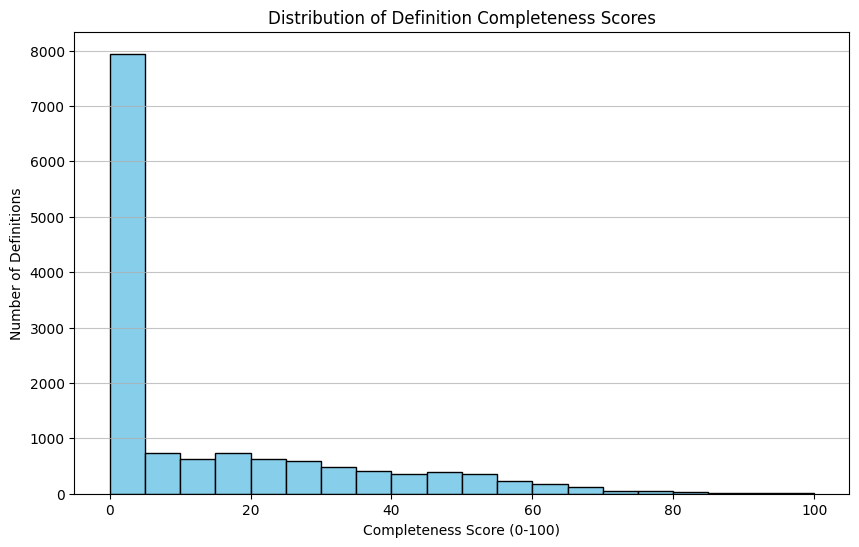

In [263]:
df_with_completeness = add_definition_completeness_scores(df)

## Empty Values

In [154]:
print("Missing values per column:")
for col in df.columns:
    perc_empty = df[df[col]==""].shape[0]/df.shape[0]
    print(f"{col}: {perc_empty:.2%}")

Missing values per column:
id: 0.00%
code: 5.38%
title: 0.00%
browser_url: 0.00%
class_kind: 0.00%
definition: 71.47%
parent: 0.00%
inclusions: 94.45%
foundation_children: 93.67%
foundation_child_references: 93.67%
index_terms: 12.78%
related_entities: 90.92%
full_text: 0.00%
children: 0.00%
postcoordination_scales: 0.00%
index_term_references: 86.34%
exclusions: 0.00%
exclusion_references: 91.21%
fully_specified_name: 99.67%


# Solution 1: Text Concatenation

Procedure in Giorgio's Computer.

In [187]:
dc = pd.read_csv('icd11-23_data_vectorization.csv')
dc.columns

Index(['id', 'code', 'title', 'browser_url', 'class_kind', 'definition',
       'parent', 'inclusions', 'foundation_children',
       'foundation_child_references', 'index_terms', 'related_entities',
       'full_text', 'children', 'postcoordination_scales',
       'index_term_references', 'exclusions', 'exclusion_references',
       'fully_specified_name', 'id_parent1', 'parent_description1',
       'vectorization_text'],
      dtype='object')

In [193]:
print(dc['vectorization_text'].iloc[0].replace('. ', '.\n'))

Title: Infections due to Chlamydia psittaci
Definition: Any condition caused by an infection with the gram-negative bacteria Chlamydia psittaci.
These conditions are characterised by variable clinical presentations such as fever, cough, headaches, chills, fatigue, nausea, vomiting, diarrhoea, or pneumonia.
Transmission is commonly by inhalation of aersol contaminated with body fluids from infected birds, or direct contact with infected birds.
Confirmation is by identification of Chlamydia psittaci.
Full text: Infections due to Chlamydia psittaci Any condition caused by an infection with the gram-negative bacteria Chlamydia psittaci.
These conditions are characterised by variable clinical presentations such as fever, cough, headaches, chills, fatigue, nausea, vomiting, diarrhoea, or pneumonia.
Transmission is commonly by inhalation of aersol contaminated with body fluids from infected birds, or direct contact with infected birds.
Confirmation is by identification of Chlamydia psittaci.


Problem: low scores on embeddings, TF-IDF higher scores than BERT-based models. 

# Solution 2: LLM Generated Descriptions

Procedure in [augmenting-descriptions.ipynb]('/Users/marco/Documents/python_projects/vector-database-ICD/augmenting-descriptions.ipynb).

In [ ]:
dg = pd.read_csv('icd11-25_data_with_generated_descriptions.csv')

In [153]:
dg.columns

Index(['id', 'code', 'title', 'browser_url', 'class_kind', 'definition',
       'parent', 'inclusions', 'foundation_children',
       'foundation_child_references', 'index_terms', 'related_entities',
       'full_text', 'children', 'postcoordination_scales',
       'index_term_references', 'exclusions', 'exclusion_references',
       'fully_specified_name', 'generated_description'],
      dtype='object')